In [ ]:
import tensorflow as tf
from tensorflow .keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical = [0,1,2,3,4]

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(x ,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

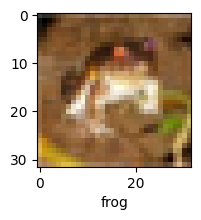

In [ ]:
plot_sample(x_train,y_train,0)

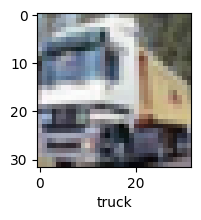

In [ ]:
plot_sample(x_train,y_train,1)

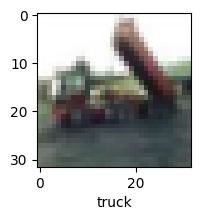

In [ ]:
plot_sample(x_train,y_train,2)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
#Compile & Train CNN Model

# Define your model here before compiling and training
# Based on your later code, you might intend to use a structure like this:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import the necessary callbacks

# Define the callbacks BEFORE they are used
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=30,
          callbacks=[early_stop, lr_reduce])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.3933 - loss: 1.6702 - val_accuracy: 0.5905 - val_loss: 1.1672 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6067 - loss: 1.1176 - val_accuracy: 0.6471 - val_loss: 1.0156 - learning_rate: 0.0010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6586 - loss: 0.9773 - val_accuracy: 0.6288 - val_loss: 1.0689 - learning_rate: 0.0010
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.6946 - loss: 0.8729 - val_accuracy: 0.6794 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7276 - loss: 0.7905 - val_accuracy: 0.6876 - val_loss: 0.9160 - learning_rate: 0.0010
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7445 - loss: 0.7305 - val_accuracy: 0.6992 - val_loss: 0.8905 - learning_rate: 0.0010
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accura

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

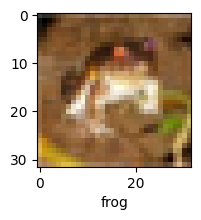

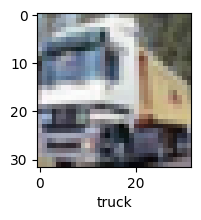

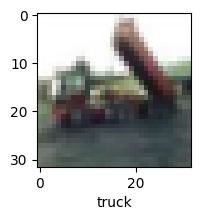

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential # Import Sequential model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense # Import necessary layers
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

x_test.shape

y_train[:5]

y_train = y_train.reshape(-1,)
y_train[:5]

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes[9]

def plot_sample(x ,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train,y_train,0)

plot_sample(x_train,y_train,1)

plot_sample(x_train,y_train,2)

x_train=x_train/255
x_test=x_test/255

num_classes = len(classes) # Define num_classes based on the number of classes

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.3045 - loss: 1.9328
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4225 - loss: 1.6379
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 0.4562 - loss: 1.5504
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4759 - loss: 1.4914
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.4931 - loss: 1.4368


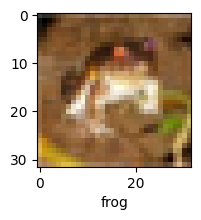

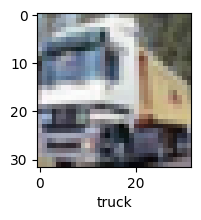

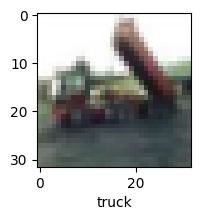

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential # Import Sequential model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense # Import necessary layers
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

x_test.shape

y_train[:5]

y_train = y_train.reshape(-1,)
y_train[:5]

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes[9]

def plot_sample(x ,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train,y_train,0)

plot_sample(x_train,y_train,1)

plot_sample(x_train,y_train,2)

x_train=x_train/255
x_test=x_test/255

num_classes = len(classes) # Define num_classes based on the number of classes

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# Remove this line, as 'ann' is not defined here
# ann.fit(...) # This line caused the IndentationError and should be removed or un-indented and potentially corrected later if 'ann' is intended to be used.

# You already have a model object from the previous cell.
# To create a new Sequential model (your 'ann'), instantiate Sequential directly.
ann = Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

In [ ]:
# You already have a model object from the previous cell.
# To create a new Sequential model (your 'ann'), instantiate Sequential directly.
ann = Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.3046 - loss: 1.9327
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.4188 - loss: 1.6447
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 82ms/step - accuracy: 0.4520 - loss: 1.5517
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 82ms/step - accuracy: 0.4778 - loss: 1.4777
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 84ms/step - accuracy: 0.4962 - loss: 1.4343


In [ ]:
#Use Callbacks (EarlyStopping, LR Scheduler)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


In [ ]:
print(y_train[0:5])

[6 9 9 4 1]


In [ ]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4788 - loss: 1.4725


[1.4771431684494019, 0.4742000102996826]

In [ ]:
#Add Batch Normalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation

# Create a new Sequential model
new_model = Sequential()

# Add the layers to the new model
new_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))

# You would then likely continue building and compiling this new_model
# new_model.add(...)
# new_model.compile(...)

In [ ]:
!pip install scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# The rest of your code remains the same
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.52      0.56      1000
           1       0.56      0.67      0.61      1000
           2       0.35      0.38      0.36      1000
           3       0.37      0.25      0.30      1000
           4       0.57      0.17      0.26      1000
           5       0.35      0.43      0.39      1000
           6       0.36      0.79      0.49      1000
           7       0.60      0.49      0.54      1000
           8       0.64      0.59      0.61      1000
           9       0.65      0.44      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [ ]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
0.45
0.67


0.67

In [ ]:
(0.45)/(0.45+0.67)

0.40178571428571425

In [ ]:
(0.67)/(0.45+0.67)

0.5982142857142857

In [ ]:

cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0928 - loss: 2.3057


[2.3047285079956055, 0.09459999948740005]

In [ ]:
#Training your CNN model
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3876 - loss: 1.6818
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6081 - loss: 1.1196
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6596 - loss: 0.9781
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7017 - loss: 0.8656
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7278 - loss: 0.7887
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7452 - loss: 0.7295
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7655 - loss: 0.6617
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7870 - loss: 0.6165
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.8020 - loss: 0.5667
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.8160 - loss: 0.5242


In [ ]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])



In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

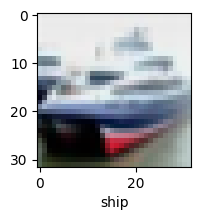

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[6.5559389e-06, 3.0982792e-05, 4.7944177e-05, 9.4200170e-01,
        6.1212275e-05, 4.9042579e-02, 3.8126607e-03, 3.1688969e-06,
        4.9712551e-03, 2.1897755e-05],
       [2.3981463e-04, 3.0366916e-02, 2.0897285e-06, 4.3966157e-08,
        3.5222150e-09, 4.2401364e-08, 4.8368214e-08, 9.7597152e-08,
        9.6927243e-01, 1.1859260e-04],
       [2.7528206e-02, 4.1730288e-02, 2.7793075e-04, 1.1737646e-03,
        1.6681333e-05, 4.7791022e-05, 2.8106871e-05, 3.6878584e-04,
        9.0643179e-01, 2.2396613e-02],
       [9.7574306e-01, 2.6702930e-04, 1.7493775e-03, 8.6446200e-04,
        1.4163546e-04, 6.1106221e-05, 6.0423634e-05, 5.0103557e-05,
        1.9865246e-02, 1.1974793e-03],
       [3.3043718e-06, 1.4177292e-05, 2.6398737e-02, 9.1777481e-02,
        2.6661664e-01, 1.6967545e-03, 6.1341685e-01, 1.2873539e-06,
        7.4706120e-05, 1.5997452e-08]], dtype=float32)

In [ ]:
np.argmax([5,12,167,2])

np.int64(2)

In [ ]:
np.argmax(y_pred[0])

np.int64(3)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

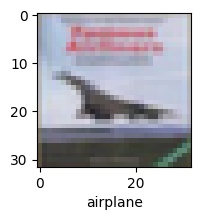

In [ ]:
plot_sample(x_test,y_test,3)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
print("classification_report: /n" , classification_report(y_test,y_classes))

classification_report: /n               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.84      0.81      0.82      1000
           2       0.64      0.52      0.57      1000
           3       0.55      0.50      0.52      1000
           4       0.67      0.63      0.65      1000
           5       0.56      0.69      0.62      1000
           6       0.75      0.80      0.77      1000
           7       0.76      0.74      0.75      1000
           8       0.80      0.81      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [ ]:
#Data Augmentation (for better generalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=64),
          validation_data=(x_test, y_test),
          epochs=30,
          callbacks=[early_stop, lr_reduce])


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 255s 322ms/step - accuracy: 0.3140 - loss: 1.8332 - val_accuracy: 0.5504 - val_loss: 1.2568 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 321ms/step - accuracy: 0.5166 - loss: 1.3364 - val_accuracy: 0.6286 - val_loss: 1.0576 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 243s 311ms/step - accuracy: 0.5800 - loss: 1.1755 - val_accuracy: 0.6519 - val_loss: 0.9908 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 324ms/step - accuracy: 0.6202 - loss: 1.0719 - val_accuracy: 0.6680 - val_loss: 0.9375 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 243s 311ms/step - accuracy: 0.6397 - loss: 1.0128 - val_accuracy: 0.6917 - val_loss: 0.8784 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 241s 308ms/step - accuracy: 0.6566 - loss: 0.9661 - val_accuracy: 0.7253 - val_loss: 0.7830 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 271s 320ms/step - accuracy: 0.6750 

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,          # less aggressive
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
